In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names


In [3]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN as it's distance-based)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Create KNN regressor
# You can experiment with different n_neighbors values
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')


In [5]:
# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


In [6]:
# Evaluate the model
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared (R²) Score: {r2_score(y_test, y_pred):.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.4324
Root Mean Squared Error (RMSE): 0.6576
Mean Absolute Error (MAE): 0.4462
R-squared (R²) Score: 0.6700


C:\Users\thatc\AppData\Local\Temp\ipykernel_3616\3781763521.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T,


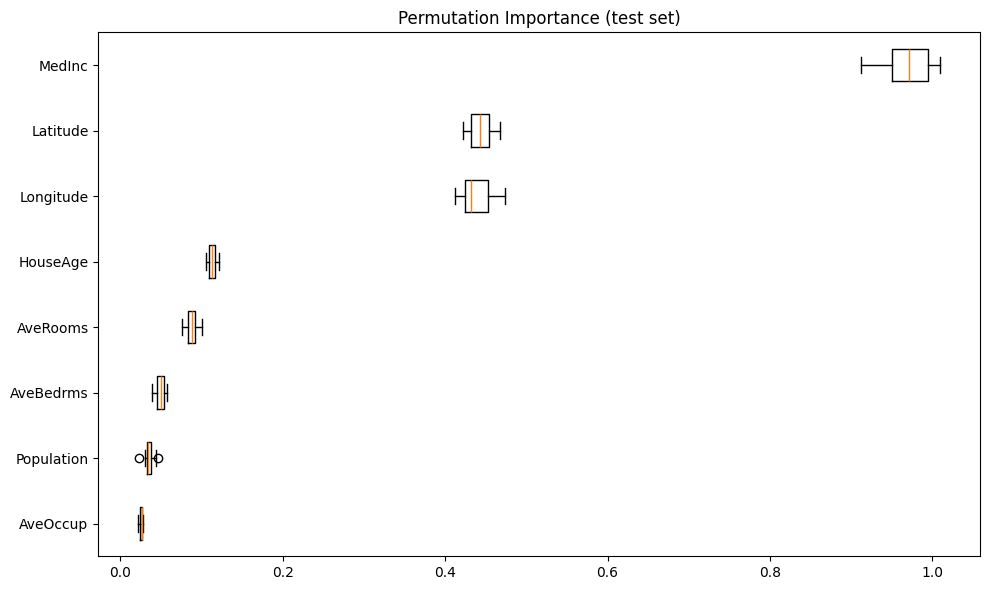

In [7]:
# Feature importance (not native to KNN, but we can use permutation importance)
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()

In [8]:
# Function to make new predictions (example)
def predict_housing_price(new_data):
    """
    Predict housing prices for new data points
    new_data: Should be a 2D array with the same features as training data
    Returns: Predicted price and confidence interval (based on neighbor prices)
    """
    # Scale the new data using the same scaler
    new_data_scaled = scaler.transform(new_data)
    prediction = knn.predict(new_data_scaled)
    
    # Get distances and indices of neighbors
    distances, indices = knn.kneighbors(new_data_scaled)
    
    # Calculate confidence interval based on neighbor prices
    neighbor_prices = y_train[indices]
    lower_bound = np.min(neighbor_prices, axis=1)
    upper_bound = np.max(neighbor_prices, axis=1)
    
    return prediction, (lower_bound, upper_bound)